## Rep Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime
import subprocess
from datetime import datetime as dt
import matplotlib.dates as mdates
import importlib
from pandas_datareader.fred import FredReader


In [2]:
import data_load_table

Load Data

In [3]:
series = data_load_table.get_fred_data('Q','own_def')

In [4]:
series['CO_level'] = series['CO_level'].shift(-1)

View Series

In [5]:
series = series.loc['1985-3-31':'2017-12-31']
series.tail()
series

,Y,Y_nominal,C,G,I,N,CO_rate,D,W_manu,PCE,...,BK,CO_level,D_nominal,BG_nominal,tax_nominal,W_manu_nominal,Piw_manu_perc,D/Y,BG/Y,BK/N
date,,,,,,,,,,,,,,,,,,,,,
1985-03-31,8.400820e+12,4.230168e+12,NaN,2.120284e+12,1.169416e+12,9.657233e+07,0.82,5.189322e+11,8.745295,49.543333,...,421196.00,9.872354e+08,5.514520e+11,1.710731e+12,3.530180e+11,9.293333,4.068682,13.036173,40.441207,0.436146
1985-06-30,8.474787e+12,4.294887e+12,NaN,2.167338e+12,1.189334e+12,9.726967e+07,0.97,5.327541e+11,8.737955,49.945000,...,445788.75,1.218759e+09,5.712900e+11,1.774640e+12,3.075820e+11,9.370000,4.111111,13.301631,41.319830,0.458302
1985-09-30,8.604220e+12,4.386773e+12,NaN,2.216743e+12,1.181226e+12,9.784433e+07,1.15,5.492326e+11,8.739574,50.337000,...,470381.50,1.464762e+09,5.926220e+11,1.823103e+12,3.400300e+11,9.430000,3.778430,13.509293,41.559091,0.480745
1985-12-31,8.668188e+12,4.444094e+12,NaN,2.225878e+12,1.224763e+12,9.842833e+07,1.28,5.601596e+11,8.715596,50.687667,...,494974.25,2.006145e+09,6.105740e+11,1.945942e+12,3.451820e+11,9.500000,3.410740,13.738998,43.787148,0.502878
1986-03-31,8.749127e+12,4.507894e+12,NaN,2.243464e+12,1.224404e+12,9.883767e+07,1.35,5.699042e+11,8.722239,51.046667,...,519567.00,1.808710e+09,6.244250e+11,1.986816e+12,3.418250e+11,9.556667,2.833572,13.851812,44.074151,0.525677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,1.930435e+13,1.908938e+13,1.306007e+13,3.389649e+12,3.391749e+12,1.452223e+08,2.11,1.501824e+12,8.507662,98.946667,...,790505.00,8.035290e+09,3.636436e+12,1.997683e+13,1.574500e+12,20.600000,2.640757,19.049525,104.648910,0.544341
2017-03-31,1.939834e+13,1.928008e+13,1.316047e+13,3.380244e+12,3.382703e+12,1.458200e+08,2.19,1.511568e+12,8.470081,99.524000,...,789020.00,8.501728e+09,3.685787e+12,1.984642e+13,1.579976e+12,20.653333,2.210492,19.117069,102.937415,0.541092
2017-06-30,1.950695e+13,1.943864e+13,1.322577e+13,3.389811e+12,3.435929e+12,1.463833e+08,2.11,1.526723e+12,8.519034,99.724333,...,789020.00,7.949218e+09,3.727037e+12,1.984455e+13,1.600122e+12,20.796667,1.827975,19.173339,102.088165,0.539009


Apply HP filter

In [6]:
# Initialize dictionaries to store the cycle and trend components
cycle_components = {}
trend_components = {}

for name, data in series.items():
    # Apply the HP filter to each series
    cycle, trend = sm.tsa.filters.hpfilter(np.log(data).dropna(), 1600)
    
    # Store the cycle and trend components in their respective dictionaries
    cycle_components[name + '_cycle'] = cycle
    trend_components[name + '_trend'] = trend



Create table

In [7]:
# # Specify which components to use for each variable in your analysis
# # Format: 'variable_name': ('dictionary_name', 'key_in_that_dictionary')
# analysis_selection = {
#     'Y': ('cycle_components', 'Y_cycle'),
#     'C': ('cycle_components', 'C_cycle'),
#     'G': ('cycle_components', 'G_cycle'),
#     'I': ('cycle_components', 'I_cycle'),
#     'N': ('cycle_components', 'N_cycle'),
#     'BK': ('cycle_components', 'BK_cycle'),
#     'CO': ('cycle_components', 'CO_cycle'),
#     'D_cycle': ('cycle_components', 'D_cycle'),
#     'D_trend': ('trend_components', 'D_trend'),
#     'W_ave': ('cycle_components', 'W_average_cycle'),
#     'W_med': ('cycle_components', 'W_median_cycle'),
#     'W_manu': ('cycle_components', 'W_manu_cycle'),
#     #'Pi': ('trend_components', 'Pi_trend'),
#     'i': ('series', 'i'),
#     'Piw_ave': ('cycle_components', 'Piw_average_cycle'),
#     'tax': ('cycle_components', 'tax_cycle'),
#     'BG/Y': ('cycle_components', 'BG_Y_cycle'),
#     # Add more as needed
# }

# # Initialize results DataFrame
# results_df = pd.DataFrame(columns=['Var', 'Std Dev', 'Cor(y, x)', 'Cor(x, x_t-1)'])

# # Perform analysis based on the specified components
# for name, (dict_name, key) in analysis_selection.items():
#     # Dynamically access the appropriate dictionary and data based on the selection
#     data = globals()[dict_name][key]
    
#     std_dev = data.std()
#     cor_y_x = data.corr(cycle_components['Y_cycle']) if 'Y_cycle' in cycle_components else None
#     cor_x_xt_minus_1 = data.corr(data.shift(1))
    
#     # Append the results
#     new_row = pd.DataFrame({
#         'Var': [name],
#         'Std Dev': [std_dev],
#         'Cor(y, x)': [cor_y_x],
#         'Cor(x, x_t-1)': [cor_x_xt_minus_1]
#     })
    
#     results_df = pd.concat([results_df, new_row], ignore_index=True)

# # Round the DataFrame for display
# results_df = results_df.round(3)

# # Display the DataFrame
# results_df

In [8]:


# # Perform analysis based on the specified components

# auto_df = pd.DataFrame(columns=['Var', 'Std Dev', '-3', '-2', '-1', '0', '1', '2', '3'])


# for name, (dict_name, key) in analysis_selection.items():
#     # Dynamically access the appropriate dictionary and data based on the selection
#     data = globals()[dict_name][key]
    
#     std_dev = data.std()

#     auto_negthree = data.corr(data.shift(-3))
#     auto_negtwo = data.corr(data.shift(-2))
#     auto_negone = data.corr(data.shift(-1))
#     auto_zero = data.corr(data.shift(0))
#     auto_one = data.corr(data.shift(1))
#     auto_two = data.corr(data.shift(2))
#     auto_three = data.corr(data.shift(3))

    
#     # Append the results
#     new_row = pd.DataFrame({
#         'Var': [name],
#         'Std Dev': [std_dev],
#         '-3': [auto_negthree],
#         '-2': [auto_negtwo],
#         '-1': [auto_negone],
#         '0': [auto_zero],
#         '1': [auto_one],
#         '2': [auto_two],
#         '3': [auto_three]
#     })
    
#     auto_df = pd.concat([auto_df, new_row], ignore_index=True)


In [9]:
# auto_df=auto_df.round(3)

In [10]:
# with open(f'/Users/awellman/Documents/SIEPR/GitHub/macrodata-wellman/check_t/table_auto.tex', 'w') as f:
#     f.write(auto_df.to_latex(index=False, float_format="%.3f"))

# with open(f'/Users/awellman/Documents/SIEPR/GitHub/macrodata-wellman/check_t/table_results.tex', 'w') as f:
#     f.write(results_df.to_latex(index=False, float_format="%.3f"))

In [11]:
# import matplotlib.pyplot as plt

# # Define the variables to plot with their professional titles
# variables_to_plot = {'W_average': 'W (Mean)', 'W_median': 'W (Median)', 'W_manu': 'W (Manufacturing)', 'D': 'Household Debt'}

# # Set up the figure and axes
# fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=3, figsize=(15, 5*len(variables_to_plot)))

# # Plot each variable
# for i, (variable, title) in enumerate(variables_to_plot.items()):
#     # Plot raw data
#     axes[i, 0].plot(series[variable], label='Raw Data')
#     axes[i, 0].set_title(f'{title} - Raw Data')
#     axes[i, 0].legend()
    
#     # Plot cycle component
#     axes[i, 1].plot(cycle_components[variable + '_cycle'], label='Cycle Component', color='orange')
#     axes[i, 1].set_title(f'{title} - Cycle Component')
#     axes[i, 1].legend()
    
#     # Plot trend component
#     axes[i, 2].plot(trend_components[variable + '_trend'], label='Trend Component', color='green')
#     axes[i, 2].set_title(f'{title} - Trend Component')
#     axes[i, 2].legend()

# # Adjust layout
# plt.tight_layout()

# # Save the plot as an image file
# plt.savefig('variable_plots.png')

# # Show the plot
# plt.show()


## New Table

Combined HP+RAW 

In [12]:
series['CPI_rate']=series['CPI'].pct_change(4)*100

In [13]:
series['PCE_rate']=series['PCE'].pct_change(4)*100

In [14]:
(series['Y_nominal']/series['CO_level'])

date
1985-03-31    4284.862566
1985-06-30    3523.983182
1985-09-30    2994.869817
1985-12-31    2215.240477
1986-03-31    2492.325537
                 ...     
2016-12-31    2375.692661
2017-03-31    2267.784170
2017-06-30    2445.352755
2017-09-30    2493.451705
2017-12-31    2301.930786
Freq: Q-DEC, Length: 132, dtype: float64

In [15]:
series['CO_rate']

date
1985-03-31    0.82
1985-06-30    0.97
1985-09-30    1.15
1985-12-31    1.28
1986-03-31    1.35
              ... 
2016-12-31    2.11
2017-03-31    2.19
2017-06-30    2.11
2017-09-30    2.21
2017-12-31    2.23
Freq: Q-DEC, Name: CO_rate, Length: 132, dtype: float64

In [16]:

top_vars = ['Y', 'C', 'G', 'I', 'N', 'D', 'BG', 'W_manu', 'W_manu_nominal', 'tax', 'BK', 'CO_level', 'CPI', 'PCE']  # Example top variables
bottom_vars = ['CPI_rate', 'PCE_rate', 'i', 'Piw_manu_perc', 'CO_rate','BK/N', 'BG/Y', 'D/Y']  # Example bottom variables
combined_results_list = []  # Use a list to collect data

# Apply HP filter to top variables and store Y's cycle for correlation
cycle_components = {}
for var in top_vars:
    data = np.log(series[var].dropna())  # Taking log of data
    cycle, _ = sm.tsa.filters.hpfilter(data, 1600)
    cycle_components[var] = cycle
y_cycle = cycle_components['Y']  # Extracted cyclical component of 'Y' for correlation

# Analyze HP filtered top variables
for var, cycle in cycle_components.items():
    sd = cycle.std()*100
    cor_y_x = cycle.corr(y_cycle)
    cor_x_xt_minus_1 = cycle.corr(cycle.shift(1))
    
    combined_results_list.append({
        'Variable': var, 'SD': sd, 'Cor(y, x)': cor_y_x, 'Cor(x, x_t-1)': cor_x_xt_minus_1
    })

# Analyze Not Filtered bottom variables but correlate with HP filtered 'Y' cycle
for var in bottom_vars:
    data = series[var]  # Not applying HP filter to bottom variables
    sd = data.std()
    cor_y_cycle_x = data.corr(y_cycle)  # Correlating with HP filtered 'Y'
    cor_x_xt_minus_1 = data.corr(data.shift(1))
    
    combined_results_list.append({
        'Variable': var, 'SD': sd, 'Cor(y, x)': cor_y_cycle_x, 'Cor(x, x_t-1)': cor_x_xt_minus_1
        #'Variable': var + ' (Not Filtered)', 'SD': sd, 'Cor(y, x)': cor_y_cycle_x, 'Cor(x, x_t-1)': cor_x_xt_minus_1
    })

# Create DataFrame from the list
combined_results = pd.DataFrame(combined_results_list)
combined_results.set_index('Variable', inplace=True)
combined_results.sort_index(inplace=True)


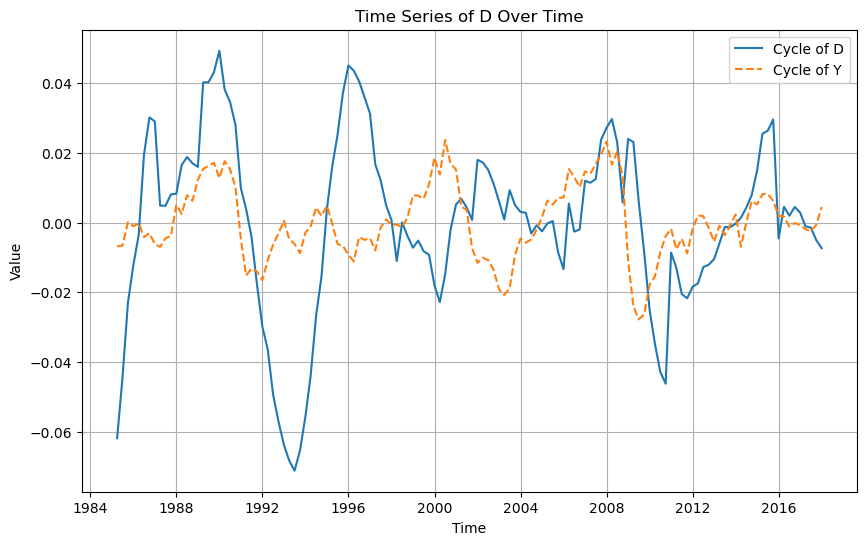

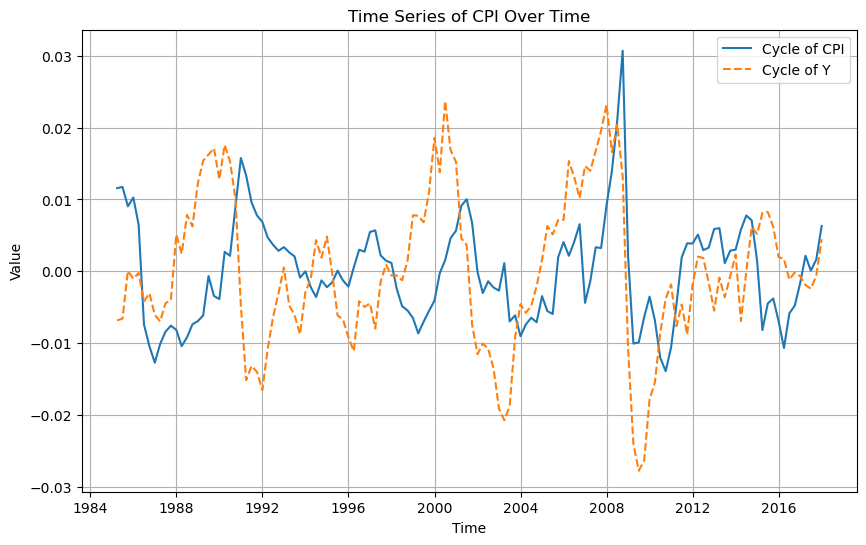

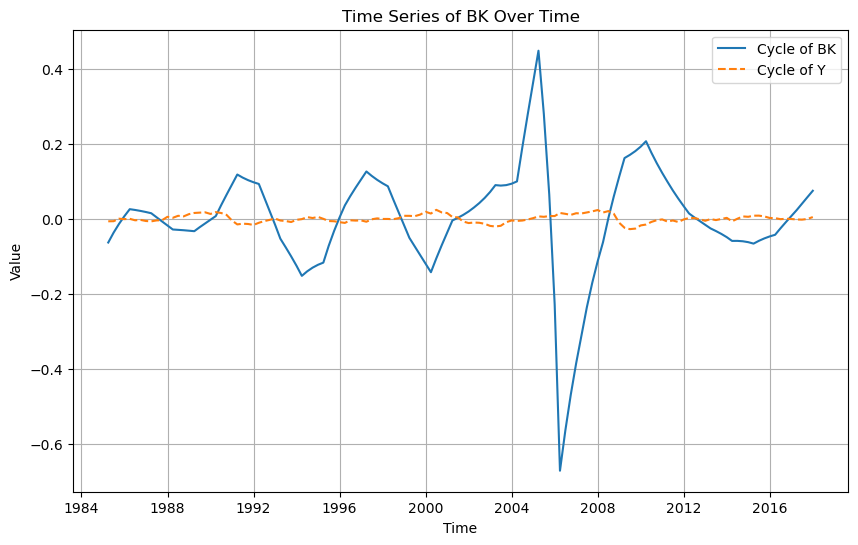

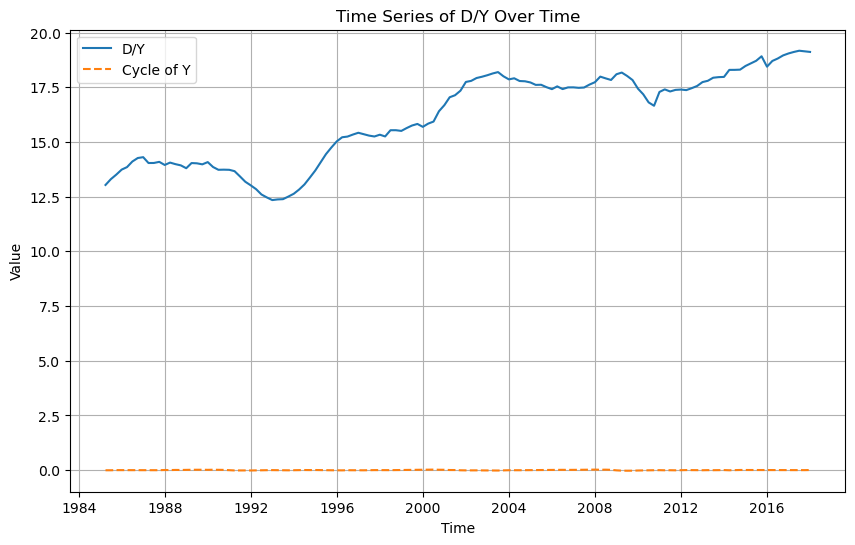

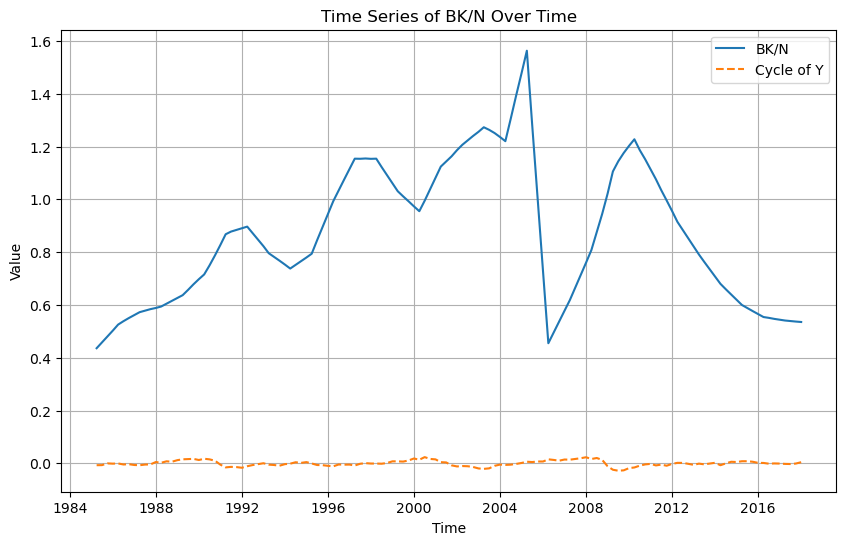

In [17]:
def plot_time_series_over_time(variable, cycle=False):
    plt.figure(figsize=(10, 6))
    
    # Plot cycle component for HP filtered variables
    if cycle:
        plt.plot(cycle_components[variable].index, cycle_components[variable], label=f'Cycle of {variable}')
        plt.plot(cycle_components['Y'].index, cycle_components['Y'], label='Cycle of Y', linestyle='--')
    else:
        plt.plot(series[variable].dropna().index, series[variable].dropna(), label=variable)
        plt.plot(cycle_components['Y'].index, cycle_components['Y'], label='Cycle of Y', linestyle='--')

    
    plt.title(f'Time Series of {variable} Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for HP filtered variables ('D', 'CPI', 'BK')
for var in ['D', 'CPI', 'BK','D/Y', 'BK/N']:
    if var in cycle_components:  # Check if the cycle component exists
        plot_time_series_over_time(var, cycle=True)

# Plot for not filtered variables ('D/Y', 'BK/N') without HP filtering but not against Y's cycle this time
for var in ['D/Y', 'BK/N']:
    if var in series:  # Check if the variable exists in the dataset
        plot_time_series_over_time(var)



In [18]:
combined_results

,SD,"Cor(y, x)","Cor(x, x_t-1)"
Variable,,,
BG,2.372258,-0.393554,0.860537
BG/Y,18.645876,-0.131001,0.998013
BK,14.255680,-0.495734,0.907192
BK/N,0.260121,-0.353061,0.974392
C,0.682030,0.878370,0.860447
CO_level,18.124560,-0.559138,0.774877
CO_rate,1.050760,-0.399883,0.964015
CPI,0.711076,0.165906,0.799507
CPI_rate,1.315480,0.398691,0.854610


Bottom filter

In [19]:
bottom_filtered_list = []  # Use a list to collect data for bottom variables

# Apply HP filter to bottom variables and store their cycle for analysis
bottom_cycle_components = {}
for var in bottom_vars:
    data = np.log(series[var]).dropna()  # Taking log of data
    cycle, _ = sm.tsa.filters.hpfilter(data, 1600)  # Apply HP filter
    bottom_cycle_components[var] = cycle

# Analyze HP filtered bottom variables
for var, cycle in bottom_cycle_components.items():
    sd = cycle.std()  # Standard deviation of the cycle component
    cor_y_x = cycle.corr(y_cycle)  # Correlation with 'Y' cycle
    cor_x_xt_minus_1 = cycle.corr(cycle.shift(1))  # Auto-correlation of the cycle component
    
    bottom_filtered_list.append({
        'Variable': var, 'SD': sd, 'Cor(y, x)': cor_y_x, 'Cor(x, x_t-1)': cor_x_xt_minus_1
    })

# Create DataFrame from the list, focused only on bottom variables
bottom_filtered = pd.DataFrame(bottom_filtered_list)
bottom_filtered.set_index('Variable', inplace=True)
bottom_filtered.sort_index(inplace=True)

bottom_filtered

/Users/alexwellman/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SD,"Cor(y, x)","Cor(x, x_t-1)"
Variable,,,
BG/Y,0.028288,-0.696933,0.888770
BK/N,0.148382,-0.536381,0.912118
CO_rate,0.172719,-0.618998,0.870944
CPI_rate,0.466588,0.138530,0.578373
D/Y,0.024135,-0.180398,0.914341
PCE_rate,0.406410,0.139851,0.723948
Piw_manu_perc,0.246713,-0.096117,0.764365
i,0.449997,0.705207,0.904156


In [20]:
# Round the numerical data in the DataFrame to three decimal places
rounded_bottom_filtered = bottom_filtered.round(3)

# Specify the file path where you want to save the LaTeX table
file_path = '/Users/alexwellman/Documents/SIEPR/GitHub/macrodata-wellman/check_t/rounded_bottom.tex'

# Export the rounded DataFrame as a LaTeX table
with open(file_path, 'w') as f:
    f.write(rounded_bottom_filtered.to_latex(index=False, float_format="%.3f"))

Annual 

In [21]:
# Computing for top variables
# Initialize an empty DataFrame for results
results_annual_change = pd.DataFrame(columns=['Variable', 'SD', 'Cor(y, x)', 'Cor(x, x_t-1)'])

for var in top_vars + bottom_vars:  # Combining top and bottom for iteration
    if var in top_vars:
        # Top variables: Compute log difference over 4 quarters and multiply by 100
        data = 100 * (np.log(series[var]) - np.log(series[var].shift(4)))
    else:
        # Bottom variables: Compute simple difference over 4 quarters
        data = series[var] - series[var].shift(4)

    y_annual=100 * (np.log(series['Y']) - np.log(series['Y'].shift(4)))
    sd = data.std()
    cor_y_x = data.corr(y_annual) 
    cor_x_xt_minus_1 = data.corr(data.shift(1))
    
    # Create a temporary DataFrame for the current variable's results
    temp_df = pd.DataFrame({
        'Variable': [var], 
        'SD': [sd], 
        'Cor(y, x)': [cor_y_x], 
        'Cor(x, x_t-1)': [cor_x_xt_minus_1]
    })
    
    # Use pd.concat to add the current variable's results to the results DataFrame
    results_annual_change = pd.concat([results_annual_change, temp_df], ignore_index=True)



Annualized Quarterly

In [22]:
# Initialize an empty DataFrame for results
results_annualized_quarterly_change = pd.DataFrame(columns=['Variable', 'SD', 'Cor(y, x)', 'Cor(x, x_t-1)'])

for var in top_vars + bottom_vars:  # Combining top and bottom for iteration
    if var in top_vars:
        # Top variables: Compute 400 times the log difference over one quarter
        data = 400 * (np.log(series[var]) - np.log(series[var].shift(1)))
    else:
        # Bottom variables: Compute 4 times the simple difference over one quarter
        data = 4 * (series[var] - series[var].shift(1))
    
    y_q= 400 * (np.log(series['Y']) - np.log(series['Y'].shift(1)))
    sd = data.std()
    cor_y_x = data.corr(y_q)
    cor_x_xt_minus_1 = data.corr(data.shift(1))
    
    # Create a temporary DataFrame for the current variable's results
    temp_df = pd.DataFrame({
        'Variable': [var], 
        'SD': [sd], 
        'Cor(y, x)': [cor_y_x], 
        'Cor(x, x_t-1)': [cor_x_xt_minus_1]
    })
    
    # Use pd.concat to add the current variable's results to the results DataFrame
    results_annualized_quarterly_change = pd.concat([results_annualized_quarterly_change, temp_df], ignore_index=True)



In [23]:
results_annualized_quarterly_change


,Variable,SD,"Cor(y, x)","Cor(x, x_t-1)"
0,Y,2.309794,1.000000,0.367385
1,C,1.797535,0.735791,0.540527
2,G,3.123618,0.189874,0.205866
3,I,11.934354,0.743582,0.300264
4,N,1.724548,0.610183,0.888339
5,D,4.871028,0.222268,0.516310
6,BG,5.940316,-0.358194,0.390192
7,W_manu,2.087480,-0.184237,0.234628
8,W_manu_nominal,1.142436,0.010151,0.320331
9,tax,18.404837,0.246859,-0.160091


Merge

In [24]:
# Merge the DataFrames side by side on the 'Variable' column
# merged_results = pd.merge(combined_results, bottom_filtered, on='Variable', how='outer', suffixes=('', '_bottom_filtered'))
# merged_results = pd.merge(merged_results, results_annual_change, on='Variable', how='outer', suffixes=('_combined', '_annual_change')) 
# merged_results = pd.merge(merged_results, results_annualized_quarterly_change, on='Variable', how='outer', suffixes=('', '_annualized_quarterly_change'))

merged_results = pd.merge(combined_results, results_annual_change, on='Variable', how='outer', suffixes=('', '_bottom_filtered'))
merged_results = pd.merge(merged_results, results_annualized_quarterly_change, on='Variable', how='outer', suffixes=('', '_annualized_quarterly_change'))

# Assuming 'top_vars' and 'bottom_vars' are defined and all variables are present
all_vars_ordered = top_vars + bottom_vars

# Create an ordered categorical type for 'Variable' column
merged_results['Variable'] = pd.Categorical(merged_results['Variable'], categories=all_vars_ordered, ordered=True)

# Sort by 'Variable' to have top variables on top and bottom variables at the bottom
merged_results.sort_values('Variable', inplace=True)

# Reset index to clean up the DataFrame
merged_results.reset_index(drop=True, inplace=True)

# Here, define the MultiIndex for columns to indicate the source and measurement type
multi_index_tuples = [
    ('', 'Variable'), ('Combined', 'SD'), ('Combined', 'Cor(y, x)'), ('Combined', 'Cor(x, x_{t-1})'),

   # ('Filter Bottom', 'SD'), ('Filter Bottom', 'Cor(y, x)'), ('Filter Bottom', 'Cor(x, x_{t-1})'),

    ('Annual Change', 'SD'), ('Annual Change', 'Cor(y, x)'), ('Annual Change', 'Cor(x, x_{t-1})'),
    ('Annualized Quarterly Change', 'SD'), ('Annualized Quarterly Change', 'Cor(y, x)'), ('Annualized Quarterly Change', 'Cor(x, x_{t-1})'),
   
]

# Note: Adjust the tuples above to match the exact structure and names of your merged_results columns

multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Data', 'Measurement'])

merged_results.columns = multi_index

merged_results

Data                          Combined                            \
Measurement        Variable         SD Cor(y, x) Cor(x, x_{t-1})   
0                         Y   1.039871  1.000000        0.879706   
1                         C   0.682030  0.878370        0.860447   
2                         G   1.223552 -0.419897        0.848107   
3                         I   5.425434  0.893683        0.871530   
4                         N   1.104419  0.807605        0.959636   
5                         D   2.501638  0.240827        0.920378   
6                        BG   2.372258 -0.393554        0.860537   
7                    W_manu   0.788773 -0.448585        0.809096   
8            W_manu_nominal   0.458369 -0.514562        0.852178   
9                       tax   7.020075  0.718653        0.802388   
10                       BK  14.255680 -0.495734        0.907192   
11                 CO_level  18.124560 -0.559138        0.774877   
12                      CPI   0.711076  0.165906        0.799507   
13                      PCE   0.560575  0.276713        0.825312   
14                 CPI_rate   1.315480  0.398691        0.854610   
15                 PCE_rate   1.111097  0.393716        0.886101   
16                        i   2.841580  0.369623        0.988128   
17            Piw_manu_perc   0.812435 -0.032132        0.883871   
18                  CO_rate   1.050760 -0.399883        0.964015   
19                     BK/N   0.260121 -0.353061        0.974392   
20                     BG/Y  18.645876 -0.131001        0.998013   
21                      D/Y   2.046557  0.004393        0.996251   

Data        Annual Change                            \
Measurement            SD Cor(y, x) Cor(x, x_{t-1})   
0                1.625734  1.000000        0.887980   
1                1.448114  0.905224        0.914641   
2                1.994572 -0.038327        0.901489   
3                7.895003  0.836331        0.849859   
4                1.601870  0.786851        0.960577   
5                3.780019  0.381125        0.931433   
6                4.112934 -0.484136        0.926854   
7                1.246501 -0.240490        0.803307   
8                0.772517 -0.047376        0.879400   
9                9.520090  0.587089        0.787360   
10              20.817609 -0.185270        0.880734   
11              22.818891 -0.314923        0.839935   
12               1.282738  0.205164        0.853993   
13               1.087502  0.227454        0.885495   
14               1.525688  0.405613        0.668864   
15               1.189921  0.446008        0.695260   
16               1.404434  0.529490        0.913999   
17               0.852458 -0.021228        0.707128   
18               0.736699 -0.400232        0.861006   
19               0.188290 -0.257051        0.883120   
20               3.412230 -0.725519        0.934867   
21               0.506901 -0.046706        0.896986   

Data        Annualized Quarterly Change                            
Measurement                          SD Cor(y, x) Cor(x, x_{t-1})  
0                              2.309794  1.000000        0.367385  
1                              1.797535  0.735791        0.540527  
2                              3.123618  0.189874        0.205866  
3                             11.934354  0.743582        0.300264  
4                              1.724548  0.610183        0.888339  
5                              4.871028  0.222268        0.516310  
6                              5.940316 -0.358194        0.390192  
7                              2.087480 -0.184237        0.234628  
8                              1.142436  0.010151        0.320331  
9                             18.404837  0.246859       -0.160091  
10                            26.791765 -0.154230        0.632651  
11                            50.281291 -0.133975       -0.056340  
12                             1.995698  0.198520        0.324514  
13                        

In [25]:
# Round the numerical data in the DataFrame to three decimal places
rounded_merged_results = merged_results.round(3)

# Specify the file path where you want to save the LaTeX table
file_path = '/Users/alexwellman/Documents/SIEPR/GitHub/macrodata-wellman/check_t/table_expanded.tex'

# Export the rounded DataFrame as a LaTeX table
with open(file_path, 'w') as f:
    f.write(rounded_merged_results.to_latex(index=False, float_format="%.3f"))
